#                                 Cement Sales Forecasting

Import required libraries

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet
from prophet.plot import plot_plotly
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math

Importing dataset

In [179]:
df = pd.read_excel(r"C:\Users\sriha\Desktop\cement project\All India_Features.xlsx")
df

,Date,GDP_Construction_Rs_Crs,GDP_Realestate_Rs_Crs,Oveall_GDP_Growth%,Water_Source,Limestone,Coal_Milliontonne,Home_Interest_Rate,Trasportation_Cost,Order_Quantity_Milliontonnes,Sales_Quantity_Milliontonnes,Unit_Price
0,2015-01-31,214180,481401,7.5,178.06,169.76,0.0944,10.15,322.070000,4.798,4.598,350.23
1,2015-02-28,214180,481401,8.0,169.09,238.44,0.0745,10.00,316.918451,4.318,4.308,350.31
2,2015-03-31,214180,481401,8.5,170.73,176.68,0.0721,9.10,286.484332,3.719,3.659,355.89
3,2015-04-30,218253,594978,8.6,266.73,234.24,0.0733,10.20,286.292799,3.583,3.510,354.63
4,2015-05-31,218253,594978,8.5,243.53,220.01,0.0734,9.90,300.299462,3.581,3.541,353.36
...,...,...,...,...,...,...,...,...,...,...,...,...
91,2022-08-31,273487,816470,8.5,121.56,141.74,0.0734,7.35,494.928740,6.317,6.245,396.26
92,2022-09-30,273487,816470,8.3,247.73,168.44,0.0893,7.35,520.414790,7.126,7.015,370.93
93,2022-10-31,324378,843219,7.6,262.48,146.56,0.1277,7.60,517.847712,7.223,7.152,362.03
94,2022-11-30,324378,843219,8.9,150.98,159.77,0.1245,7.75,581.142216,8.229,8.124,357.67


In [180]:
sub = df[['Date', 'Sales_Quantity_Milliontonnes']]
sub

,Date,Sales_Quantity_Milliontonnes
0,2015-01-31,4.598
1,2015-02-28,4.308
2,2015-03-31,3.659
3,2015-04-30,3.510
4,2015-05-31,3.541
...,...,...
91,2022-08-31,6.245
92,2022-09-30,7.015
93,2022-10-31,7.152
94,2022-11-30,8.124


In [181]:
df.describe()

,GDP_Construction_Rs_Crs,GDP_Realestate_Rs_Crs,Oveall_GDP_Growth%,Water_Source,Limestone,Coal_Milliontonne,Home_Interest_Rate,Trasportation_Cost,Order_Quantity_Milliontonnes,Sales_Quantity_Milliontonnes,Unit_Price
count,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,240150.187500,699625.31250,5.460417,202.713229,168.941667,0.089729,7.966146,436.675698,5.621927,5.568677,376.462917
std,54762.487549,119928.39492,6.850685,52.629867,39.720864,0.023971,1.139910,116.204055,1.674881,1.643412,15.064145
min,24071.000000,481401.00000,-28.300000,103.250000,100.430000,0.059800,6.650000,248.878362,3.039000,3.021000,350.150000
25%,224883.500000,611022.00000,5.200000,164.052500,139.740000,0.073000,6.925000,335.536787,4.122000,4.103500,363.760000
50%,240005.500000,701130.50000,6.800000,199.145000,168.765000,0.082200,7.850000,433.109541,5.670500,5.646500,377.300000
75%,261470.500000,799100.00000,8.100000,243.707500,202.352500,0.098425,8.337500,519.000843,6.914250,6.897000,389.380000
max,338283.000000,924137.00000,24.500000,298.670000,247.280000,0.150100,10.750000,715.424600,9.047000,8.954000,399.830000


In [182]:
df.isna().sum()

Date                            0
GDP_Construction_Rs_Crs         0
GDP_Realestate_Rs_Crs           0
Oveall_GDP_Growth%              0
Water_Source                    0
Limestone                       0
Coal_Milliontonne               0
Home_Interest_Rate              0
Trasportation_Cost              0
Order_Quantity_Milliontonnes    0
Sales_Quantity_Milliontonnes    0
Unit_Price                      0
dtype: int64

In [183]:
df.duplicated().sum()

0

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          96 non-null     datetime64[ns]
 1   GDP_Construction_Rs_Crs       96 non-null     int64         
 2   GDP_Realestate_Rs_Crs         96 non-null     int64         
 3   Oveall_GDP_Growth%            96 non-null     float64       
 4   Water_Source                  96 non-null     float64       
 5   Limestone                     96 non-null     float64       
 6   Coal_Milliontonne             96 non-null     float64       
 7   Home_Interest_Rate            96 non-null     float64       
 8   Trasportation_Cost            96 non-null     float64       
 9   Order_Quantity_Milliontonnes  96 non-null     float64       
 10  Sales_Quantity_Milliontonnes  96 non-null     float64       
 11  Unit_Price                    96 n

Typecasting

In [185]:
df[['GDP_Realestate_Rs_Crs', 'GDP_Construction_Rs_Crs']] = df[['GDP_Realestate_Rs_Crs', 'GDP_Construction_Rs_Crs']].astype(float)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          96 non-null     datetime64[ns]
 1   GDP_Construction_Rs_Crs       96 non-null     float64       
 2   GDP_Realestate_Rs_Crs         96 non-null     float64       
 3   Oveall_GDP_Growth%            96 non-null     float64       
 4   Water_Source                  96 non-null     float64       
 5   Limestone                     96 non-null     float64       
 6   Coal_Milliontonne             96 non-null     float64       
 7   Home_Interest_Rate            96 non-null     float64       
 8   Trasportation_Cost            96 non-null     float64       
 9   Order_Quantity_Milliontonnes  96 non-null     float64       
 10  Sales_Quantity_Milliontonnes  96 non-null     float64       
 11  Unit_Price                    96 n

(array([14., 15.,  9.,  7., 12., 10., 11.,  7.,  8.,  3.]),
 array([3.021 , 3.6143, 4.2076, 4.8009, 5.3942, 5.9875, 6.5808, 7.1741,
        7.7674, 8.3607, 8.954 ]),
 <BarContainer object of 10 artists>)

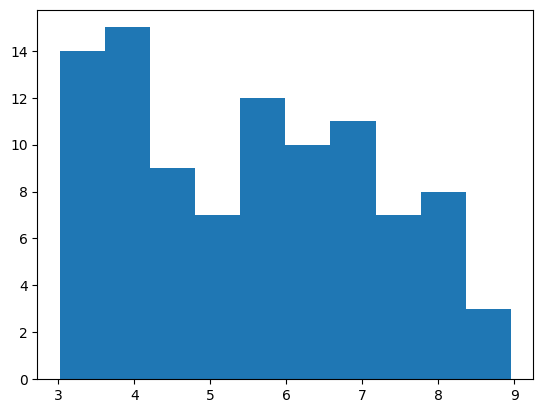

In [187]:
plt.hist(df['Sales_Quantity_Milliontonnes'])

Checking outliers

C:\Users\sriha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='GDP_Construction_Rs_Crs'>

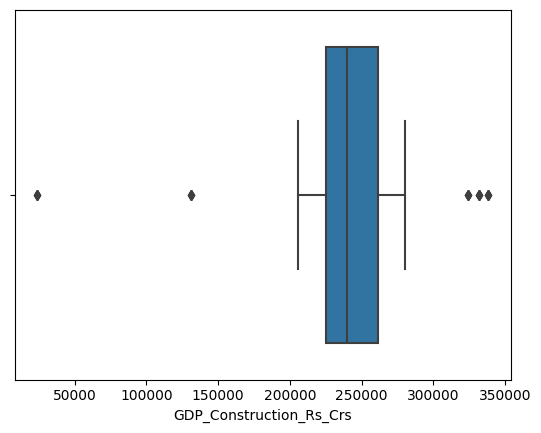

In [188]:
sns.boxplot(df['GDP_Construction_Rs_Crs'])

C:\Users\sriha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='Oveall_GDP_Growth%'>

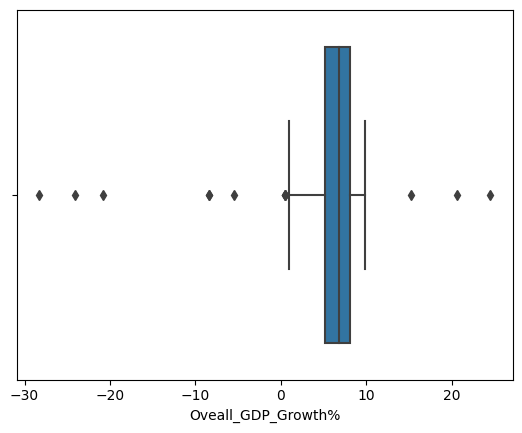

In [189]:
sns.boxplot(df['Oveall_GDP_Growth%'])

C:\Users\sriha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='Coal_Milliontonne'>

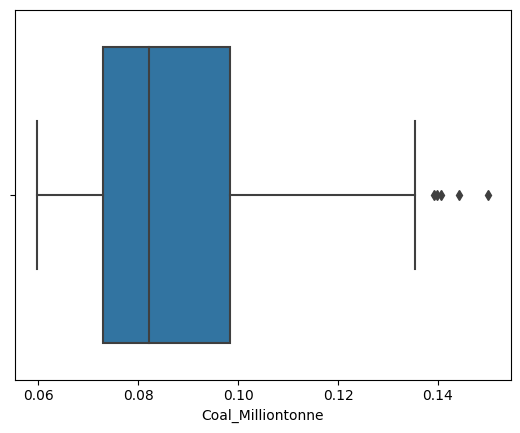

In [190]:
sns.boxplot(df['Coal_Milliontonne'])

C:\Users\sriha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='Home_Interest_Rate'>

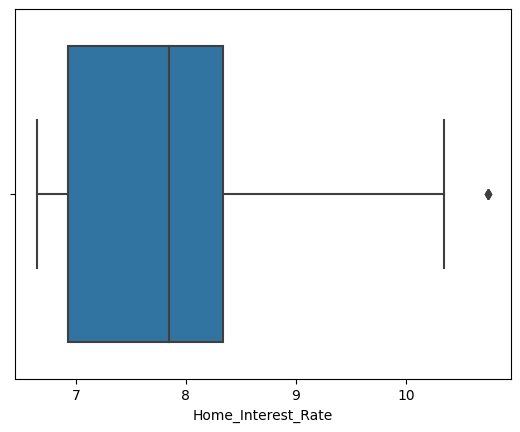

In [191]:
sns.boxplot(df['Home_Interest_Rate'])

Winsorization to remove outliers

In [192]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['GDP_Construction_Rs_Crs', 'Oveall_GDP_Growth%',
                    'Coal_Milliontonne', 'Home_Interest_Rate'])

df[['GDP_Construction_Rs_Crs', 'Oveall_GDP_Growth%', 'Coal_Milliontonne', 'Home_Interest_Rate']] = winsor.fit_transform(df[['GDP_Construction_Rs_Crs',
                                                                          'Oveall_GDP_Growth%', 'Coal_Milliontonne', 'Home_Interest_Rate']])
df

,Date,GDP_Construction_Rs_Crs,GDP_Realestate_Rs_Crs,Oveall_GDP_Growth%,Water_Source,Limestone,Coal_Milliontonne,Home_Interest_Rate,Trasportation_Cost,Order_Quantity_Milliontonnes,Sales_Quantity_Milliontonnes,Unit_Price
0,2015-01-31,214180.0,481401.0,7.5,178.06,169.76,0.0944,10.15,322.070000,4.798,4.598,350.23
1,2015-02-28,214180.0,481401.0,8.0,169.09,238.44,0.0745,10.00,316.918451,4.318,4.308,350.31
2,2015-03-31,214180.0,481401.0,8.5,170.73,176.68,0.0721,9.10,286.484332,3.719,3.659,355.89
3,2015-04-30,218253.0,594978.0,8.6,266.73,234.24,0.0733,10.20,286.292799,3.583,3.510,354.63
4,2015-05-31,218253.0,594978.0,8.5,243.53,220.01,0.0734,9.90,300.299462,3.581,3.541,353.36
...,...,...,...,...,...,...,...,...,...,...,...,...
91,2022-08-31,273487.0,816470.0,8.5,121.56,141.74,0.0734,7.35,494.928740,6.317,6.245,396.26
92,2022-09-30,273487.0,816470.0,8.3,247.73,168.44,0.0893,7.35,520.414790,7.126,7.015,370.93
93,2022-10-31,316351.0,843219.0,7.6,262.48,146.56,0.1277,7.60,517.847712,7.223,7.152,362.03
94,2022-11-30,316351.0,843219.0,8.9,150.98,159.77,0.1245,7.75,581.142216,8.229,8.124,357.67


visualizing sales performance of historic data

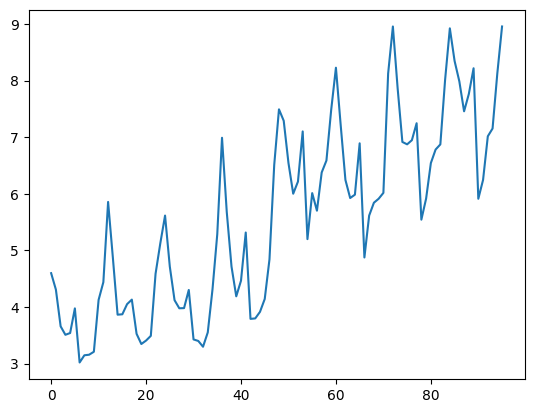

In [193]:
plt.plot(df['Sales_Quantity_Milliontonnes'])

adfuller test to check stationarity

In [194]:
for i in range(len(df.columns)):
    result = adfuller(df[df.columns[i]])
    
    if result[1] > 0.05 :
        print('{} - series is not stationary'.format(df.columns[i]))
    else:
        print('{} - series is stationary'.format(df.columns[i]))

Date - series is not stationary
GDP_Construction_Rs_Crs - series is not stationary
GDP_Realestate_Rs_Crs - series is not stationary
Oveall_GDP_Growth% - series is not stationary
Water_Source - series is stationary
Limestone - series is stationary
Coal_Milliontonne - series is not stationary
Home_Interest_Rate - series is not stationary
Trasportation_Cost - series is not stationary
Order_Quantity_Milliontonnes - series is not stationary
Sales_Quantity_Milliontonnes - series is not stationary
Unit_Price - series is stationary


standardizing the data

In [195]:
from sklearn import preprocessing

In [196]:
scaled = df.drop(['Date', 'Sales_Quantity_Milliontonnes'], axis = 1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(scaled)
df_scaled = pd.DataFrame(scaled_df, columns=scaled.columns)
df_scaled

,GDP_Construction_Rs_Crs,GDP_Realestate_Rs_Crs,Oveall_GDP_Growth%,Water_Source,Limestone,Coal_Milliontonne,Home_Interest_Rate,Trasportation_Cost,Order_Quantity_Milliontonnes,Unit_Price
0,0.301863,0.000000,0.573276,0.382816,0.472114,0.450741,0.919540,0.156880,0.292776,0.001610
1,0.301863,0.000000,0.616379,0.336915,0.939803,0.191500,0.880131,0.145838,0.212883,0.003221
2,0.301863,0.000000,0.659483,0.345308,0.519237,0.160234,0.643678,0.080605,0.113182,0.115539
3,0.329694,0.256534,0.668103,0.836557,0.911202,0.175867,0.932677,0.080194,0.090546,0.090177
4,0.329694,0.256534,0.659483,0.717839,0.814300,0.177170,0.853859,0.110217,0.090213,0.064614
...,...,...,...,...,...,...,...,...,...,...
91,0.707109,0.756814,0.659483,0.093696,0.281307,0.177170,0.183908,0.527387,0.545606,0.928140
92,0.707109,0.756814,0.642241,0.739331,0.463126,0.384302,0.183908,0.582014,0.680260,0.418277
93,1.000000,0.817232,0.581897,0.814809,0.314130,0.884546,0.249589,0.576512,0.696405,0.239130
94,1.000000,0.817232,0.693966,0.244243,0.404086,0.842859,0.288998,0.712178,0.863848,0.151369


In [197]:
df = pd.concat([sub, df_scaled], axis = 1)
df

,Date,Sales_Quantity_Milliontonnes,GDP_Construction_Rs_Crs,GDP_Realestate_Rs_Crs,Oveall_GDP_Growth%,Water_Source,Limestone,Coal_Milliontonne,Home_Interest_Rate,Trasportation_Cost,Order_Quantity_Milliontonnes,Unit_Price
0,2015-01-31,4.598,0.301863,0.000000,0.573276,0.382816,0.472114,0.450741,0.919540,0.156880,0.292776,0.001610
1,2015-02-28,4.308,0.301863,0.000000,0.616379,0.336915,0.939803,0.191500,0.880131,0.145838,0.212883,0.003221
2,2015-03-31,3.659,0.301863,0.000000,0.659483,0.345308,0.519237,0.160234,0.643678,0.080605,0.113182,0.115539
3,2015-04-30,3.510,0.329694,0.256534,0.668103,0.836557,0.911202,0.175867,0.932677,0.080194,0.090546,0.090177
4,2015-05-31,3.541,0.329694,0.256534,0.659483,0.717839,0.814300,0.177170,0.853859,0.110217,0.090213,0.064614
...,...,...,...,...,...,...,...,...,...,...,...,...
91,2022-08-31,6.245,0.707109,0.756814,0.659483,0.093696,0.281307,0.177170,0.183908,0.527387,0.545606,0.928140
92,2022-09-30,7.015,0.707109,0.756814,0.642241,0.739331,0.463126,0.384302,0.183908,0.582014,0.680260,0.418277
93,2022-10-31,7.152,1.000000,0.817232,0.581897,0.814809,0.314130,0.884546,0.249589,0.576512,0.696405,0.239130
94,2022-11-30,8.124,1.000000,0.817232,0.693966,0.244243,0.404086,0.842859,0.288998,0.712178,0.863848,0.151369


In [198]:
train = df.iloc[:84]
test = df.iloc[84:]
train, test

(         Date  Sales_Quantity_Milliontonnes  GDP_Construction_Rs_Crs  \
 0  2015-01-31                         4.598                 0.301863   
 1  2015-02-28                         4.308                 0.301863   
 2  2015-03-31                         3.659                 0.301863   
 3  2015-04-30                         3.510                 0.329694   
 4  2015-05-31                         3.541                 0.329694   
 ..        ...                           ...                      ...   
 79 2021-08-31                         5.915                 0.642790   
 80 2021-09-30                         6.542                 0.642790   
 81 2021-10-31                         6.781                 1.000000   
 82 2021-11-30                         6.872                 1.000000   
 83 2021-12-31                         8.011                 1.000000   
 
     GDP_Realestate_Rs_Crs  Oveall_GDP_Growth%  Water_Source  Limestone  \
 0                0.000000            0.573276 

Rename date and sales columns

Prophet expect date column and output column names to be ds and y

In [199]:
train = train.rename(columns={'Sales_Quantity_Milliontonnes': 'y', 'Date':'ds'})
train

,ds,y,GDP_Construction_Rs_Crs,GDP_Realestate_Rs_Crs,Oveall_GDP_Growth%,Water_Source,Limestone,Coal_Milliontonne,Home_Interest_Rate,Trasportation_Cost,Order_Quantity_Milliontonnes,Unit_Price
0,2015-01-31,4.598,0.301863,0.000000,0.573276,0.382816,0.472114,0.450741,0.919540,0.156880,0.292776,0.001610
1,2015-02-28,4.308,0.301863,0.000000,0.616379,0.336915,0.939803,0.191500,0.880131,0.145838,0.212883,0.003221
2,2015-03-31,3.659,0.301863,0.000000,0.659483,0.345308,0.519237,0.160234,0.643678,0.080605,0.113182,0.115539
3,2015-04-30,3.510,0.329694,0.256534,0.668103,0.836557,0.911202,0.175867,0.932677,0.080194,0.090546,0.090177
4,2015-05-31,3.541,0.329694,0.256534,0.659483,0.717839,0.814300,0.177170,0.853859,0.110217,0.090213,0.064614
...,...,...,...,...,...,...,...,...,...,...,...,...
79,2021-08-31,5.915,0.642790,0.512188,0.000000,0.535871,0.761253,0.100309,0.000000,0.447977,0.492011,0.742754
80,2021-09-30,6.542,0.642790,0.512188,0.000000,0.314911,0.131971,0.295717,0.000000,0.534818,0.596372,0.619364
81,2021-10-31,6.781,1.000000,0.519438,0.012931,0.081619,0.492884,0.488520,0.000000,0.628815,0.639481,1.000000
82,2021-11-30,6.872,1.000000,0.519438,0.047414,0.323048,0.039224,0.737339,0.000000,0.587350,0.644640,0.610105


In [200]:
test = test.rename(columns={'Sales_Quantity_Milliontonnes': 'y', 'Date':'ds'})
test

,ds,y,GDP_Construction_Rs_Crs,GDP_Realestate_Rs_Crs,Oveall_GDP_Growth%,Water_Source,Limestone,Coal_Milliontonne,Home_Interest_Rate,Trasportation_Cost,Order_Quantity_Milliontonnes,Unit_Price
84,2022-01-31,8.921,0.634891,0.901016,1.000000,0.876267,0.626013,0.844162,0.000000,0.908302,0.979028,0.540459
85,2022-02-28,8.345,0.634891,0.901016,1.000000,0.189694,0.671638,0.737339,0.000000,0.818004,0.899800,0.556159
86,2022-03-31,7.985,0.634891,0.901016,1.000000,0.892693,0.160708,0.607067,0.000000,0.689291,0.832057,0.142110
87,2022-04-30,7.456,0.608789,1.000000,0.737069,0.805803,0.321961,0.488520,0.026273,0.710374,0.747170,0.785024
88,2022-05-31,7.762,0.608789,1.000000,0.564655,0.556340,0.104528,0.412571,0.052545,0.660733,0.797603,0.175926
89,2022-06-30,8.216,0.608789,1.000000,0.650862,0.953485,0.808989,0.347826,0.105090,0.867589,0.890979,0.958937
90,2022-07-31,5.912,0.707109,0.756814,0.581897,0.172961,0.221859,0.057320,0.131363,0.392432,0.507989,0.305556
91,2022-08-31,6.245,0.707109,0.756814,0.659483,0.093696,0.281307,0.177170,0.183908,0.527387,0.545606,0.928140
92,2022-09-30,7.015,0.707109,0.756814,0.642241,0.739331,0.463126,0.384302,0.183908,0.582014,0.680260,0.418277
93,2022-10-31,7.152,1.000000,0.817232,0.581897,0.814809,0.314130,0.884546,0.249589,0.576512,0.696405,0.239130


Initiating model

In [201]:
model = Prophet()

Adding regressors to the model built

In [202]:
model.add_regressor('GDP_Construction_Rs_Crs')
model.add_regressor('GDP_Realestate_Rs_Crs')
model.add_regressor('Oveall_GDP_Growth%')
model.add_regressor('Water_Source')
model.add_regressor('Limestone')
model.add_regressor('Coal_Milliontonne')
model.add_regressor('Home_Interest_Rate')
model.add_regressor('Trasportation_Cost')
model.add_regressor('Order_Quantity_Milliontonnes')
model.add_regressor('Unit_Price')

In [203]:
model.fit(train)

13:20:48 - cmdstanpy - INFO - Chain [1] start processing
13:20:49 - cmdstanpy - INFO - Chain [1] done processing


In [204]:
train_forecasts = model.predict(train)
train_forecasts

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Coal_Milliontonne,Coal_Milliontonne_lower,Coal_Milliontonne_upper,GDP_Construction_Rs_Crs,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-31,4.806024,4.328179,4.595200,4.806024,4.806024,0.002527,0.002527,0.002527,0.016821,...,-0.363874,-0.363874,-0.363874,0.020485,0.020485,0.020485,0.0,0.0,0.0,4.462636
1,2015-02-28,4.816159,4.098522,4.404769,4.816159,4.816159,-0.004714,-0.004714,-0.004714,0.016821,...,-0.766893,-0.766893,-0.766893,0.206632,0.206632,0.206632,0.0,0.0,0.0,4.255898
2,2015-03-31,4.827381,3.493684,3.788301,4.827381,4.827381,-0.005587,-0.005587,-0.005587,0.016821,...,-1.300909,-1.300909,-1.300909,0.111520,0.111520,0.111520,0.0,0.0,0.0,3.637992
3,2015-04-30,4.838240,3.331932,3.615140,4.838240,4.838240,-0.005150,-0.005150,-0.005150,0.014139,...,-1.362638,-1.362638,-1.362638,-0.005838,-0.005838,-0.005838,0.0,0.0,0.0,3.469765
4,2015-05-31,4.849462,3.417324,3.700612,4.849462,4.849462,-0.005114,-0.005114,-0.005114,0.014139,...,-1.315113,-1.315113,-1.315113,0.023420,0.023420,0.023420,0.0,0.0,0.0,3.557768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2021-08-31,5.531304,5.782421,6.073127,5.531304,5.531304,-0.007261,-0.007261,-0.007261,-0.016043,...,0.423460,0.423460,0.423460,-0.029240,-0.029240,-0.029240,0.0,0.0,0.0,5.925524
80,2021-09-30,5.533943,6.407673,6.693671,5.533943,5.533943,-0.001803,-0.001803,-0.001803,-0.016043,...,1.077073,1.077073,1.077073,-0.055270,-0.055270,-0.055270,0.0,0.0,0.0,6.555746
81,2021-10-31,5.536670,6.603269,6.875594,5.536670,5.536670,0.003583,0.003583,0.003583,-0.050477,...,1.207383,1.207383,1.207383,-0.004370,-0.004370,-0.004370,0.0,0.0,0.0,6.739683
82,2021-11-30,5.539309,6.762152,7.047719,5.539309,5.539309,0.010532,0.010532,0.010532,-0.050477,...,1.337254,1.337254,1.337254,0.024078,0.024078,0.024078,0.0,0.0,0.0,6.900641


In [205]:
plot_plotly(model, train_forecasts)

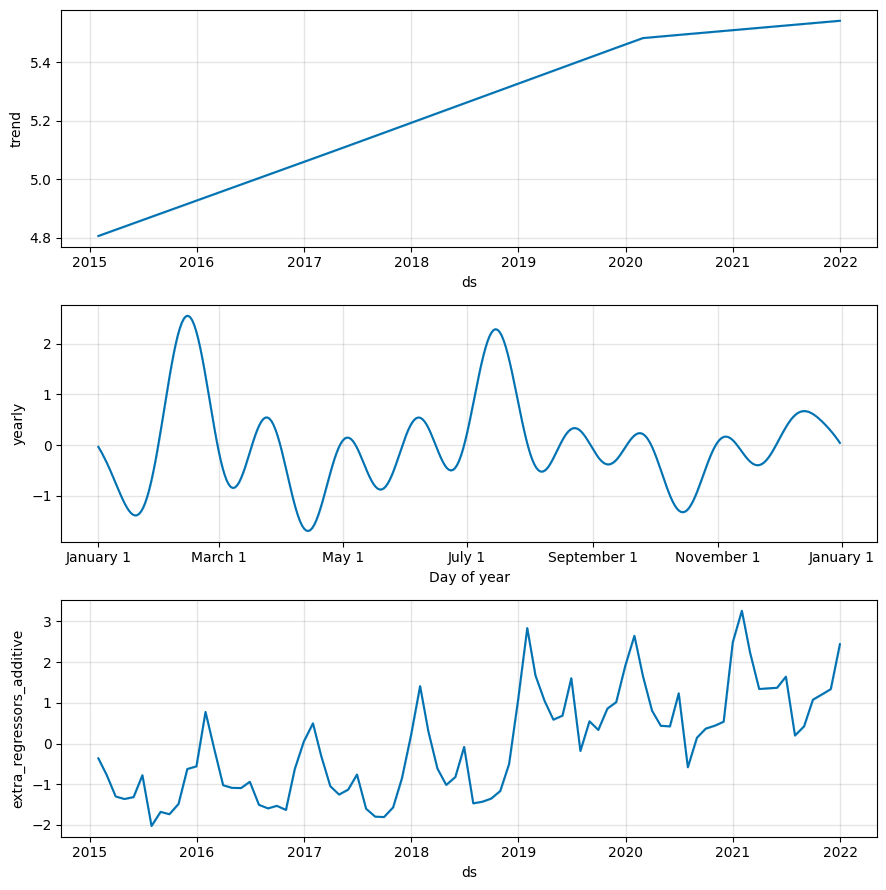

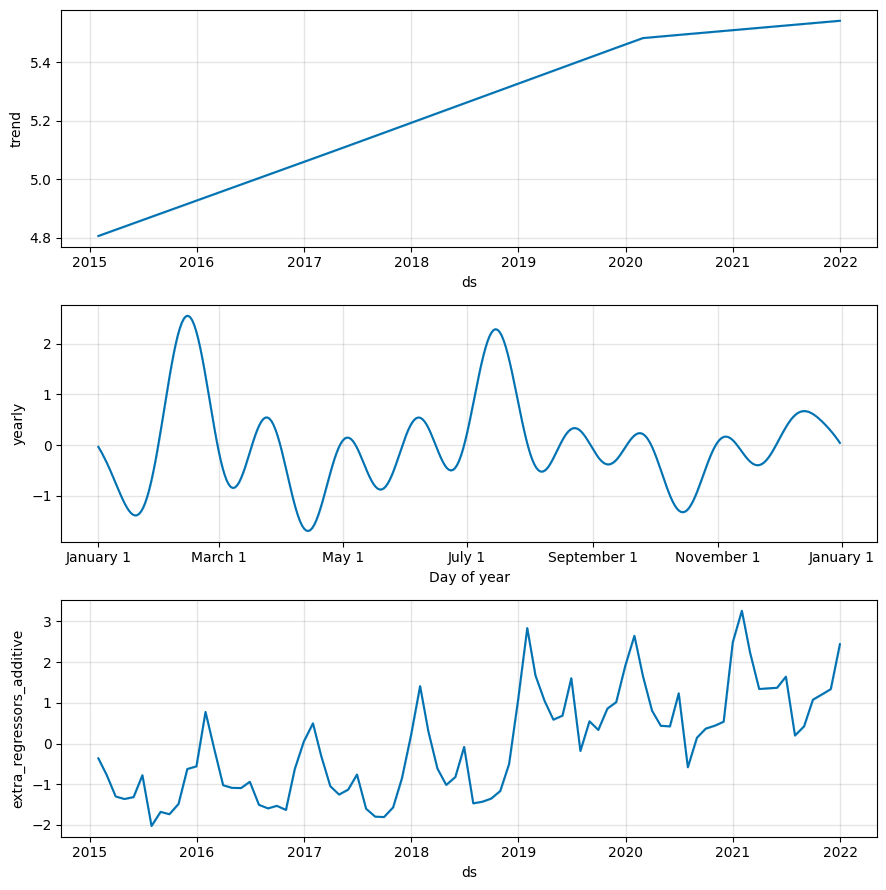

In [206]:
model.plot_components(train_forecasts)

In [207]:
mse = mean_squared_error(train_forecasts['yhat'], train['y'])
rmse = math.sqrt(mse)
mae = mean_absolute_error(train_forecasts['yhat'], train['y'])
mape = mean_absolute_percentage_error(train_forecasts['yhat'], train['y'])
mse, rmse, mae, mape

(0.012472543216885483,
 0.11168054090523327,
 0.06975526619363527,
 0.013643187079573333)

In [208]:
test_df = test.drop(['y'], axis=1)
test_df

,ds,GDP_Construction_Rs_Crs,GDP_Realestate_Rs_Crs,Oveall_GDP_Growth%,Water_Source,Limestone,Coal_Milliontonne,Home_Interest_Rate,Trasportation_Cost,Order_Quantity_Milliontonnes,Unit_Price
84,2022-01-31,0.634891,0.901016,1.000000,0.876267,0.626013,0.844162,0.000000,0.908302,0.979028,0.540459
85,2022-02-28,0.634891,0.901016,1.000000,0.189694,0.671638,0.737339,0.000000,0.818004,0.899800,0.556159
86,2022-03-31,0.634891,0.901016,1.000000,0.892693,0.160708,0.607067,0.000000,0.689291,0.832057,0.142110
87,2022-04-30,0.608789,1.000000,0.737069,0.805803,0.321961,0.488520,0.026273,0.710374,0.747170,0.785024
88,2022-05-31,0.608789,1.000000,0.564655,0.556340,0.104528,0.412571,0.052545,0.660733,0.797603,0.175926
89,2022-06-30,0.608789,1.000000,0.650862,0.953485,0.808989,0.347826,0.105090,0.867589,0.890979,0.958937
90,2022-07-31,0.707109,0.756814,0.581897,0.172961,0.221859,0.057320,0.131363,0.392432,0.507989,0.305556
91,2022-08-31,0.707109,0.756814,0.659483,0.093696,0.281307,0.177170,0.183908,0.527387,0.545606,0.928140
92,2022-09-30,0.707109,0.756814,0.642241,0.739331,0.463126,0.384302,0.183908,0.582014,0.680260,0.418277
93,2022-10-31,1.000000,0.817232,0.581897,0.814809,0.314130,0.884546,0.249589,0.576512,0.696405,0.239130


In [209]:
test_forecasts = model.predict(test_df)
test_forecasts

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Coal_Milliontonne,Coal_Milliontonne_lower,Coal_Milliontonne_upper,GDP_Construction_Rs_Crs,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-31,5.544762,8.487165,8.785436,5.544680,5.544832,0.013516,0.013516,0.013516,-0.015282,...,3.013099,3.013099,3.013099,0.079289,0.079289,0.079289,0.0,0.0,0.0,8.637150
1,2022-02-28,5.547226,8.058821,8.350849,5.546894,5.547579,0.010532,0.010532,0.010532,-0.015282,...,2.504602,2.504602,2.504602,0.151841,0.151841,0.151841,0.0,0.0,0.0,8.203669
2,2022-03-31,5.549952,7.726486,8.014079,5.549260,5.550778,0.006894,0.006894,0.006894,-0.015282,...,2.238205,2.238205,2.238205,0.076591,0.076591,0.076591,0.0,0.0,0.0,7.864749
3,2022-04-30,5.552591,7.207001,7.491569,5.551439,5.553951,0.003583,0.003583,0.003583,-0.012765,...,1.776174,1.776174,1.776174,0.013521,0.013521,0.013521,0.0,0.0,0.0,7.342287
4,2022-05-31,5.555318,7.560834,7.842698,5.553540,5.557290,0.001461,0.001461,0.001461,-0.012765,...,2.094830,2.094830,2.094830,0.052124,0.052124,0.052124,0.0,0.0,0.0,7.702272
5,2022-06-30,5.557957,7.959498,8.246653,5.555541,5.560595,-0.000347,-0.000347,-0.000347,-0.012765,...,2.520335,2.520335,2.520335,0.032628,0.032628,0.032628,0.0,0.0,0.0,8.110921
6,2022-07-31,5.560684,5.895913,6.188223,5.557530,5.564014,-0.008462,-0.008462,-0.008462,-0.022243,...,0.478512,0.478512,0.478512,-0.002294,-0.002294,-0.002294,0.0,0.0,0.0,6.036902
7,2022-08-31,5.563411,6.075432,6.368823,5.559456,5.567578,-0.005114,-0.005114,-0.005114,-0.022243,...,0.673170,0.673170,0.673170,-0.012244,-0.012244,-0.012244,0.0,0.0,0.0,6.224338
8,2022-09-30,5.566050,6.836876,7.124485,5.561316,5.571052,0.000672,0.000672,0.000672,-0.022243,...,1.444833,1.444833,1.444833,-0.033219,-0.033219,-0.033219,0.0,0.0,0.0,6.977664
9,2022-10-31,5.568777,6.980844,7.270556,5.563136,5.574613,0.014644,0.014644,0.014644,-0.050477,...,1.573294,1.573294,1.573294,-0.021868,-0.021868,-0.021868,0.0,0.0,0.0,7.120203


In [210]:
plot_plotly(model, test_forecasts)

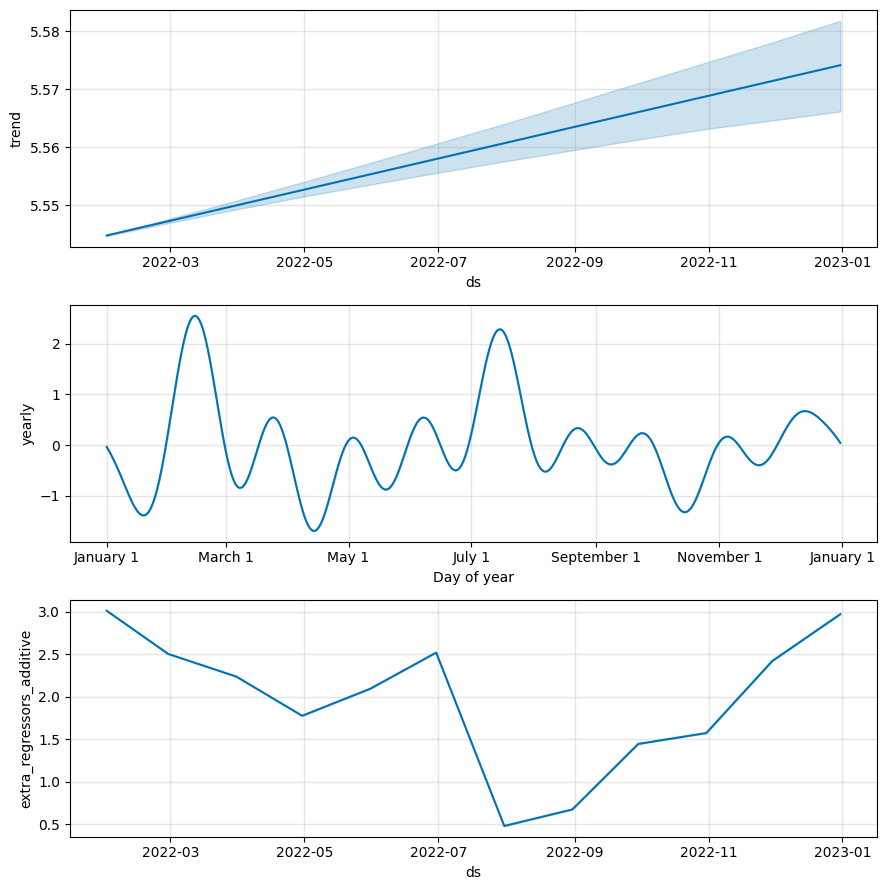

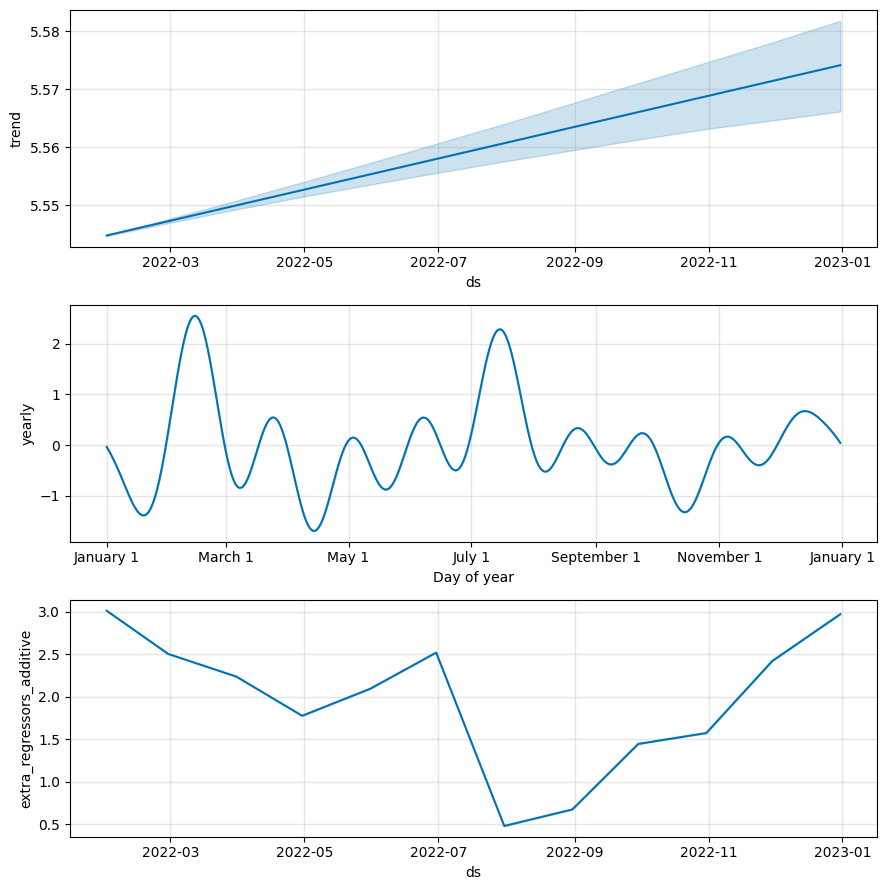

In [211]:
model.plot_components(test_forecasts)

In [212]:
test_forecasts = pd.DataFrame(test_forecasts[['yhat', 'yhat_upper', 'yhat_lower', 'Order_Quantity_Milliontonnes']])
test_forecasts

,yhat,yhat_upper,yhat_lower,Order_Quantity_Milliontonnes
0,8.637150,8.785436,8.487165,2.254189
1,8.203669,8.350849,8.058821,1.956234
2,7.864749,8.014079,7.726486,1.701471
3,7.342287,7.491569,7.207001,1.382234
4,7.702272,7.842698,7.560834,1.571898
5,8.110921,8.246653,7.959498,1.923059
6,6.036902,6.188223,5.895913,0.482738
7,6.224338,6.368823,6.075432,0.624203
8,6.977664,7.124485,6.836876,1.130600
9,7.120203,7.270556,6.980844,1.191318


In [213]:
mse = mean_squared_error(test_forecasts['yhat'], test['y'])
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_forecasts['yhat'], test['y'])
mape = mean_absolute_percentage_error(test_forecasts['yhat'], test['y'])
mse, rmse, mae, mape

(0.024965120363209848,
 0.15800354541341738,
 0.12626136404013924,
 0.015991480712809456)

In [175]:
final_df = pd.concat((test_forecasts['yhat'], test['y']), axis = 1)
final_df

,yhat,y
0,8.637150,NaN
1,8.203669,NaN
2,7.864749,NaN
3,7.342287,NaN
4,7.702272,NaN
5,8.110921,NaN
6,6.036902,NaN
7,6.224338,NaN
8,6.977664,NaN
9,7.120203,NaN


In [214]:
import pickle
with open('Prophet.pkl', "wb") as f:
    pickle.dump(model, f)